In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_df

,Missing Values,Percentage (%)
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [3]:
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast               0
country            0
date_added        98
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

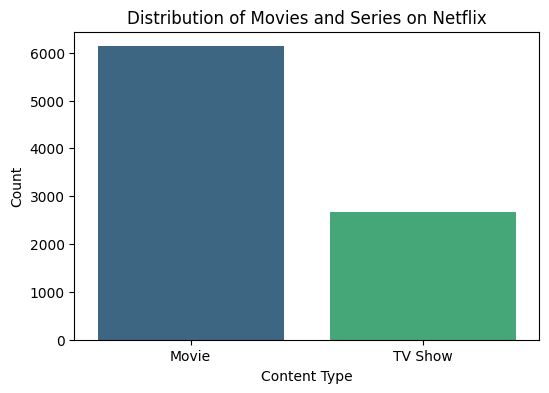

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Distribution of Movies and Series on Netflix")
plt.show()

type_counts

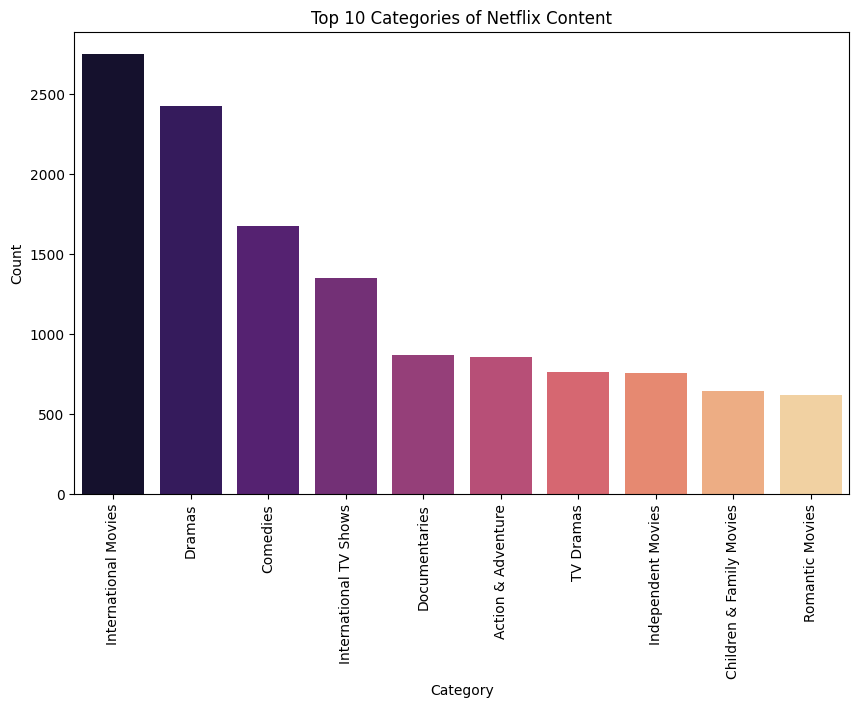

In [5]:
category_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top 10 Categories of Netflix Content")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


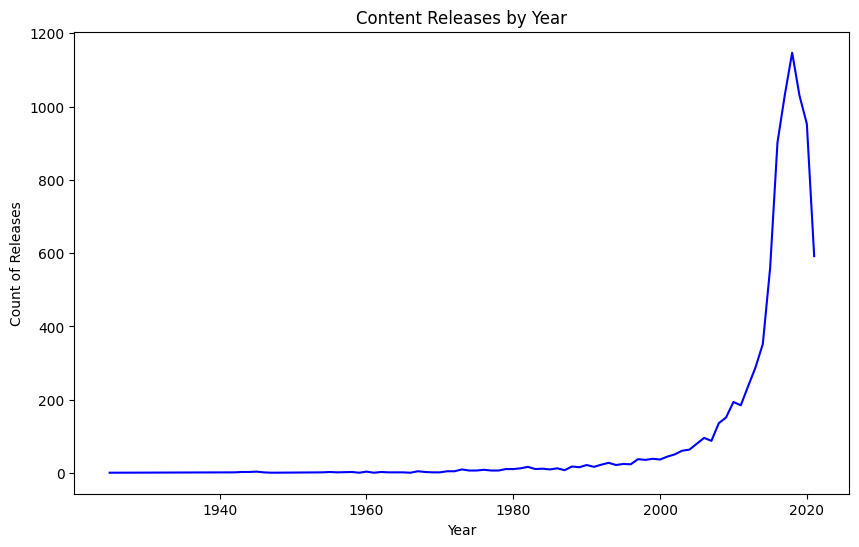

In [6]:
release_year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, color="blue")
plt.xlabel("Year")
plt.ylabel("Count of Releases")
plt.title("Content Releases by Year")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


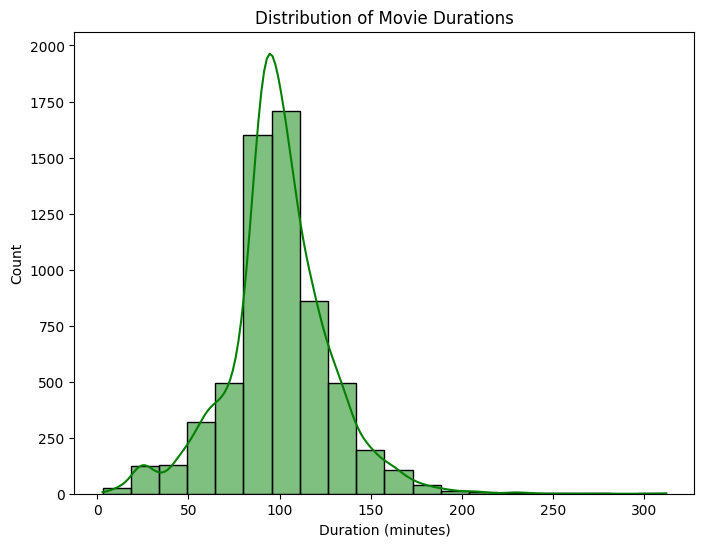

In [7]:
df['duration'] = df['duration'].apply(lambda x: pd.to_numeric(x.split(' ')[0], errors='coerce') if 'min' in str(x) else None)

plt.figure(figsize=(8, 6))
sns.histplot(df['duration'].dropna(), kde=True, color="green", bins=20)
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie Durations")
plt.show()

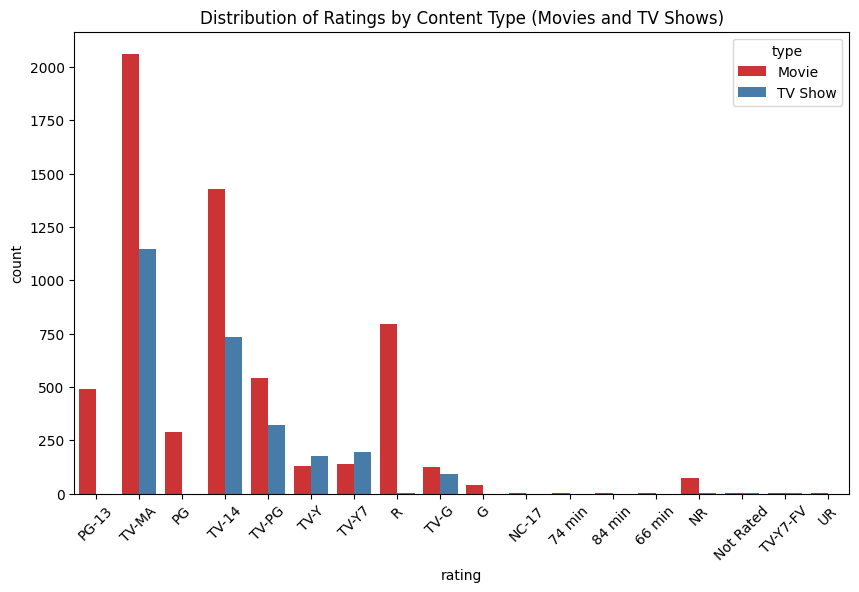

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='type', palette='Set1')
plt.title("Distribution of Ratings by Content Type (Movies and TV Shows)")
plt.xticks(rotation=45)
plt.show()

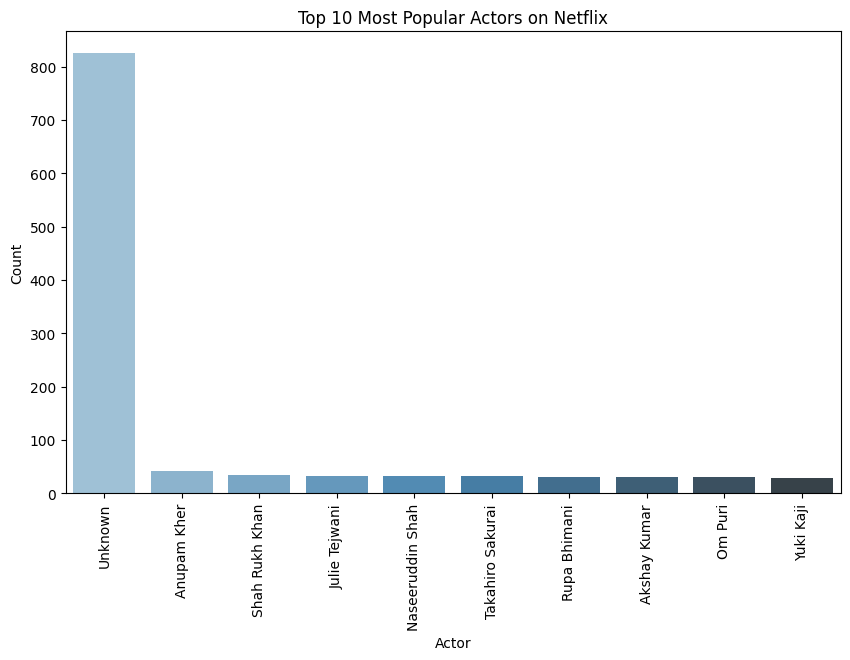

In [9]:
actor_counts = df['cast'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.index[:10], y=actor_counts.values[:10], palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel("Actor")
plt.ylabel("Count")
plt.title("Top 10 Most Popular Actors on Netflix")
plt.show()

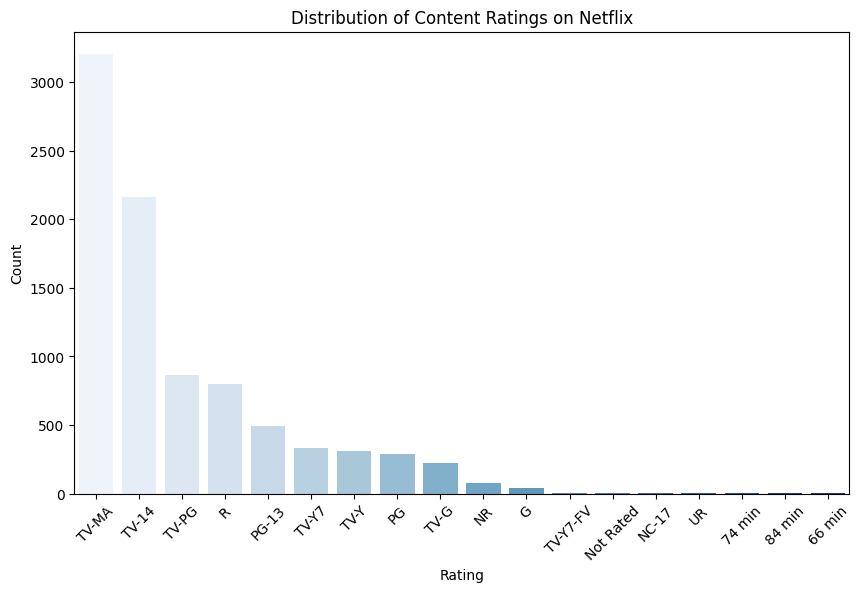

In [10]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Content Ratings on Netflix")
plt.xticks(rotation=45)
plt.show()